<a href="https://colab.research.google.com/github/Godofin/data_science/blob/main/Introdu%C3%A7%C3%A3o_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alucar - Analisando as vendas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.read_csv("alucar.csv").head()

In [ ]:
alucar = pd.read_csv("alucar.csv")

In [ ]:
alucar.head()

In [ ]:
print("Quantidade de linhas e colunas: ", alucar.shape)

In [ ]:
print("Quantidade de dados nulos: ", alucar.isna().sum().sum()) #isna = mostra a quantidade de dados nulos

In [ ]:
alucar.dtypes

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes']) #Converter dados para formato de datas
alucar.dtypes

In [ ]:
print(sns.__version__)

**Gráfico com MatplotLib**

In [ ]:
fig = plt.figure(figsize=(12,6)) #Objeto de figura
eixo = fig.add_axes([0, 0, 1, 1]) #Definindo os eixos de 0 à 1
eixo.plot(alucar['mes'], alucar['vendas'], color='k') #definindo o que colocar em cada eixo
eixo.set_title('Vendas alucar de 2017 e 2018', fontsize=20, loc='left') #Título do gráfico
eixo.set_xlabel("Mês", fontsize=18)
eixo.set_ylabel("Vendas", fontsize=18)
eixo.legend(['vendas'], loc='lower right', fontsize=10)
eixo.grid(True)

**Gráfico com Seaborn**

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [ ]:
sns.set_palette("Accent")
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas alucar de 2017 e 2018", loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax=ax

In [ ]:
alucar.head()

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()  #Pega o valor aumento no dataframe e subtrai com o valor anterior
alucar.head()

Aumento das vendas matplotlib

In [ ]:
fig = plt.figure(figsize=(12,6)) #Objeto de figura
eixo = fig.add_axes([0, 0, 1, 1]) #Definindo os eixos de 0 à 1
eixo.plot(alucar['mes'], alucar['aumento'], color='k') #definindo o que colocar em cada eixo
eixo.set_title('Aumento alucar de 2017 e 2018', fontsize=20, loc='left') #Título do gráfico
eixo.set_xlabel("Mês", fontsize=18)
eixo.set_ylabel("Aumento", fontsize=18)
eixo.legend(['vendas'], loc='lower right', fontsize=10)
eixo.grid(True)

Aumento das vendas seaborn

In [ ]:
sns.set_palette("Accent")
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento alucar de 2017 e 2018", loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax=ax

Criação de uma função para plotar o gráfico

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette("Accent")
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax=ax

In [ ]:
plotar('Aumento alucar 2017 a 2018','Tempo', 'Aumento',
        'mes', 'aumento', alucar )

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff() #Pega o valor aumento no dataframe e subtrai com o valor anterior
alucar.head()

In [ ]:
plotar("Aceleração de vendas 2017 a 2018",'Tempo','Aceleração', 
       'mes', 'aceleracao', alucar )

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise de vendas da alucar de 2017 a 2018", fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

**Criando função para os três gráficos juntos**

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax


In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Vendas alucar 2017 a 2018')

# Autocorrelaão alucar

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
plt.figure(figsize=(12,6))
autocorrelation_plot(alucar['vendas'])
ax=ax

# Alucar - Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv("newsletter_alucar.csv")
assinantes.head()

In [ ]:
assinantes.dtypes

In [ ]:
print("Quantidade de linhas e colunas: ", assinantes.shape)
print("Quantidade de dados nulos", assinantes.isna().sum().sum())

In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 
                assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas


In [ ]:
chocolura = pd.read_csv("chocolura.csv")
chocolura.head()

In [ ]:
chocolura.dtypes

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

In [ ]:
print("Quantidade de linhas e colunas: ", chocolura.shape)
print("Quantidade de valores nulos: ", chocolura['vendas'].isna().sum().sum())

In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                chocolura, 'Análise de vendas de chocolate - Chocolura')

# Chocolura - Vendas diárias(outubro e novembro)

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia

In [ ]:
print("Quantidade de linhas e colunas", vendas_por_dia.shape)
print("Quantidade de valores nulos", vendas_por_dia.isna().sum().sum())

In [ ]:
vendas_por_dia.dtypes

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [ ]:
vendas_por_dia.dtypes

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, "Análise de vendas por dia")

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

In [ ]:
vendas_por_dia['dia_da_semana'].unique()

In [ ]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday': 'Quarta',
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
                    'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [ ]:
vendas_por_dia.head()

**Agrupando os dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

In [ ]:
vendas_agrupadas

**Correlação das vendas diárias**

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

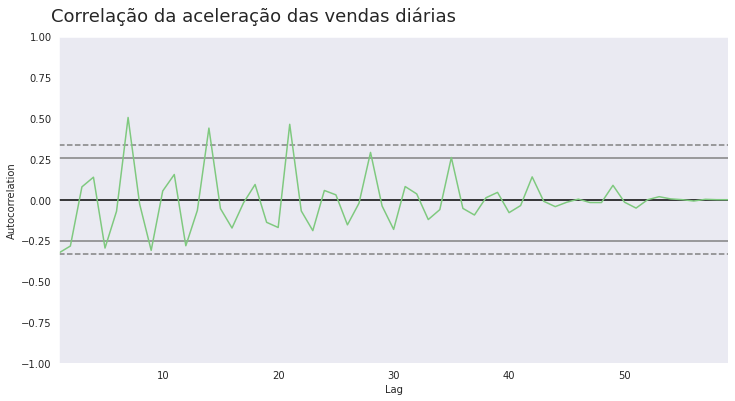

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv("cafelura.csv")
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas', cafelura.shape)
print("Quantidade de valores nulos", cafelura.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de valores nulos 0


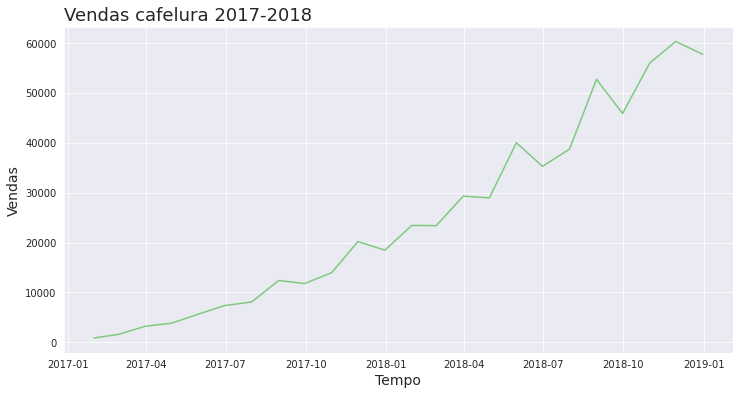

In [ ]:
plotar('Vendas cafelura 2017-2018', 'Tempo', 'Vendas',
       'mes', 'vendas', cafelura)

In [ ]:
dias_final_de_semana = pd.read_csv('dias_final_de_semana.csv')
dias_final_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
dias_final_de_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / dias_final_de_semana['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


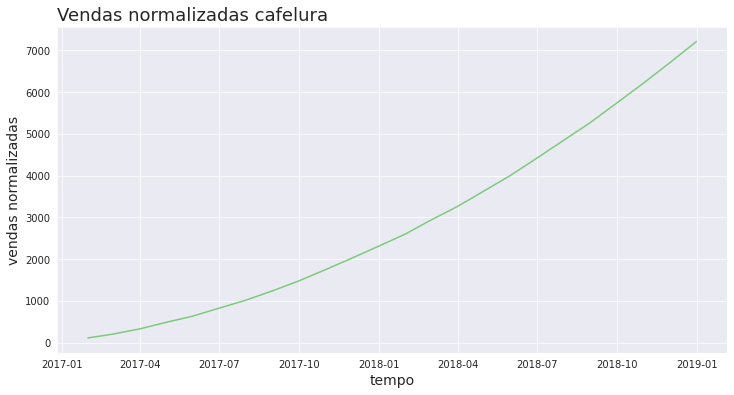

In [ ]:
plotar('Vendas normalizadas cafelura', 'tempo', 'vendas normalizadas',
       'mes', 'vendas_normalizadas', cafelura)

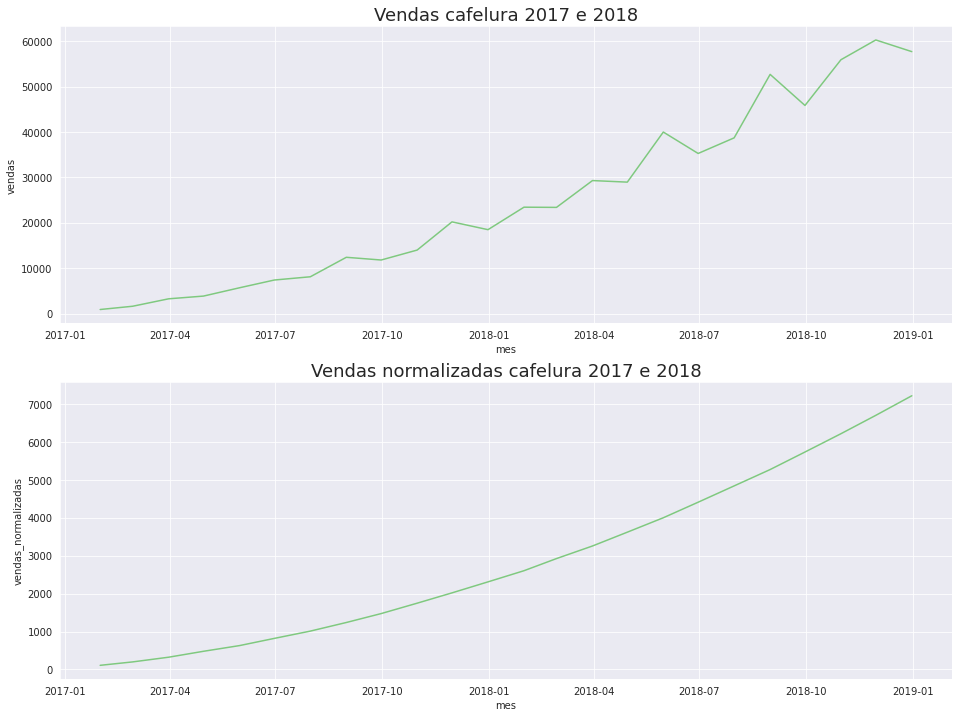

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title("Vendas cafelura 2017 e 2018", fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax= plt.subplot(2,1,2)
ax.set_title("Vendas normalizadas cafelura 2017 e 2018", fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

# StatesModels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendendcia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendendcia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 
                'Exemplo de StatesModels')

# Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv("alucel.csv")
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas', alucel.shape)
print("Quantidade de dados nulos", alucel.isna().sum().sum())

Quantidade de linhas e colunas (61, 2)
Quantidade de dados nulos 0


In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


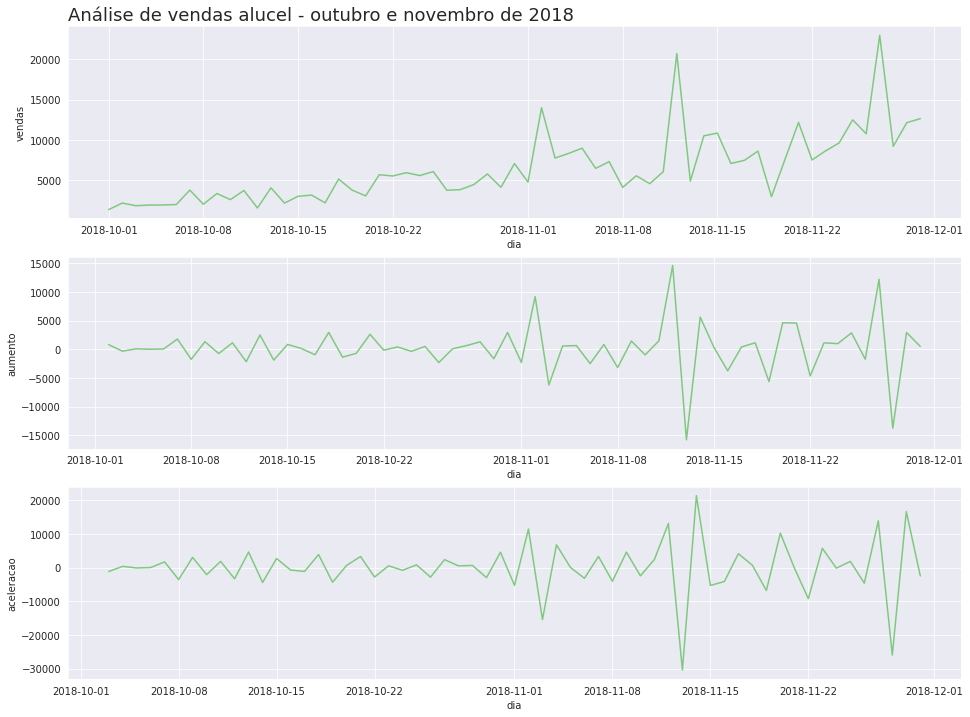

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento',
                'aceleracao', alucel, 
                "Análise de vendas alucel - outubro e novembro de 2018")

**Média móvel**

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN


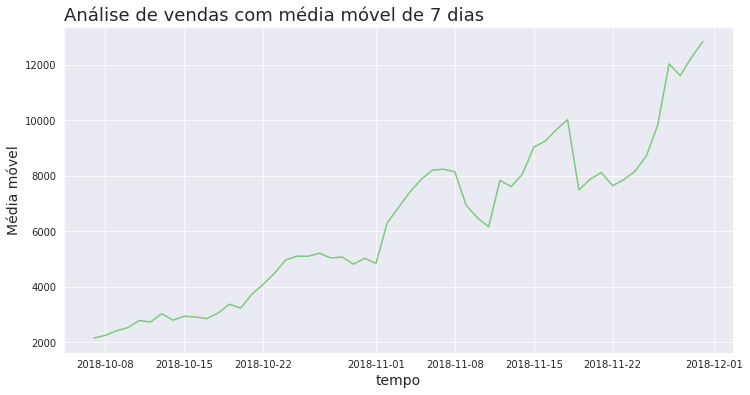

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 
       'tempo', 'Média móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

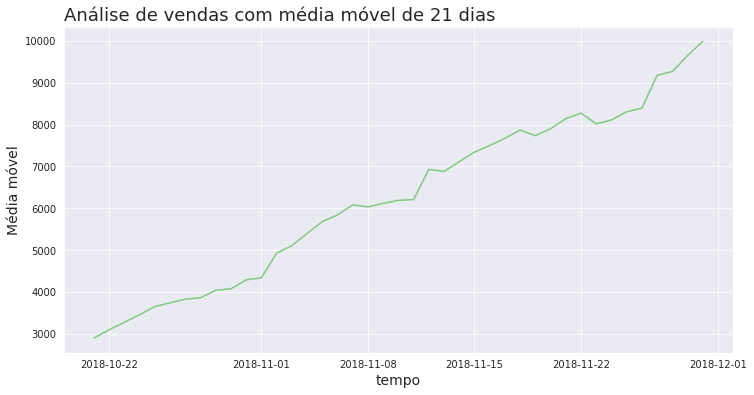

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 
       'tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

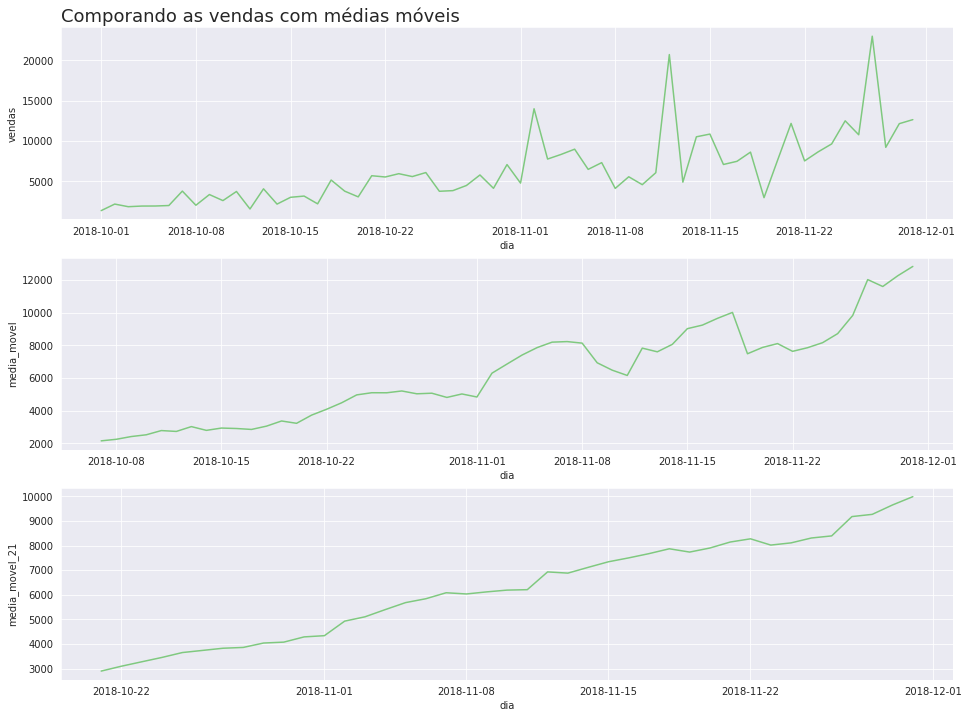

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
                alucel, "Comporando as vendas com médias móveis")